# EDA for sentiments of comments from subreddit posts in Bhutan
### Dataset Description:


The dataset consists of all the comments from the top 100 posts of all time of Bhutan's subreddits. For each comment the sentiments are identified as positive, negative or neutral. The dataset is available in the following folder path: [dataset](csv_data/all_comments.csv)


- Number of posts: 100
- Number of initial comments: 685

# EDA for sentiments of comments from subreddit posts in Bhutan
### Dataset Description:


The dataset consists of all the comments from the top 100 posts of all time of Bhutan's subreddits. For each comment the sentiments are identified as positive, negative or neutral. The dataset is available in the following folder path: [dataset](csv_data/all_comments.csv)


- Number of posts: 100
- Number of initial comments: 685

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the entrire corpus of comments
all_comments = pd.read_csv('comments/all_comments.csv')

In [3]:
all_comments.head()

,Comment ID,Comment,Score (Upvotes),Length of Comment,Author Username,Author Karma,Account Age,User Flair,Parent ID,Depth,Award Count,Award Type,Created UTC,Cardiff_Sentiment,finiteautomata_Sentiment,seethal_Sentiment,Sentiment
0,i97m86z,Sigma rule music in the background lol,3,38,wide-lense-4058,28,1.633478e+09,NaN,t3_ut4xg9,0,0,[],1.652973e+09,neutral,neutral,neutral,neutral
1,iekkmoe,The **up** here is literal,2,26,Diprogamer,86614,1.600607e+09,NaN,t3_ut4xg9,0,0,[],1.656766e+09,neutral,negative,neutral,neutral
2,gb0hahu,(No info was available about this building)\n\...,4,73,Slaiday,8725,1.589834e+09,NaN,t3_jncezp,0,0,[],1.604418e+09,positive,neutral,positive,positive
3,gb36bx3,Nope. It’s a nine storied temple in Rinchendin...,2,67,rjrigden,61,1.586987e+09,NaN,t1_gb2l3xx,1,0,[],1.604468e+09,neutral,neutral,neutral,neutral
4,i9134ff,lmao💀,8,5,Unknown,0,0.000000e+00,NaN,t3_urwzzi,0,0,[],1.652843e+09,negative,neutral,neutral,neutral


### Data Preprocessing

The irrelevant columns are removed from the dataset. The dataset is then cleaned by removing the special characters, punctuations, numbers and stop words.

In [4]:
# Delete irrelevant columns
all_comments.drop(['User Flair', 'Award Type'], axis=1, inplace=True)

In [5]:
# Preprocessing the Created UTC and the Account Age columns

# Converting these column values to number of days before the account that was used to scrape was created
# It was found that the creatd utc is time starting from 1/1/1970
# Assuming that the baseline date is 26/08/2023. The number of days before this date are taken as the values for these columns.
days_baseline = 19595
all_comments['Created UTC'] = all_comments['Created UTC'].apply(lambda x: days_baseline - round(x/86400))
all_comments['Account Age'] = all_comments['Account Age'].apply(lambda x: days_baseline - round(x/86400))

In [6]:
# Deleting the rows with comments that have been deleted

all_comments = all_comments[all_comments['Comment'] != '[deleted]']

In [7]:
# Removing the outlier data from the account age column where the account age is above 10000 days
all_comments = all_comments[all_comments['Account Age'] < 10000]

In [8]:
#Remove emojis urls and punctuations from the comments
import re
def remove_emojis_urls_punctuations(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+','', text)
    return text

all_comments['Comment'] = all_comments['Comment'].apply(lambda x: remove_emojis_urls_punctuations(x))

#Remove white spaces before and after the comments
all_comments['Comment'] = all_comments['Comment'].apply(lambda x: x.strip())
# Remove the rows with empty comments
all_comments = all_comments[all_comments['Comment'] != ''] 

In [9]:
# Convert the sentiment colums to numbers
all_comments['Sentiment'] = all_comments['Sentiment'].map({'positive': 1, 'negative': -1 , 'neutral': 0})
all_comments['Cardiff_Sentiment'] = all_comments['Cardiff_Sentiment'].map({'positive': 1, 'negative': -1 , 'neutral': 0})
all_comments['finiteautomata_Sentiment'] = all_comments['finiteautomata_Sentiment'].map({'positive': 1, 'negative': -1 , 'neutral': 0})
all_comments['seethal_Sentiment'] = all_comments['seethal_Sentiment'].map({'positive': 1, 'negative': -1 , 'neutral': 0})

In [10]:
all_comments.head()

,Comment ID,Comment,Score (Upvotes),Length of Comment,Author Username,Author Karma,Account Age,Parent ID,Depth,Award Count,Created UTC,Cardiff_Sentiment,finiteautomata_Sentiment,seethal_Sentiment,Sentiment
0,i97m86z,Sigma rule music in the background lol,3,38,wide-lense-4058,28,689,t3_ut4xg9,0,0,463,0,0,0,0
1,iekkmoe,The up here is literal,2,26,Diprogamer,86614,1069,t3_ut4xg9,0,0,419,0,-1,0,0
2,gb0hahu,No info was available about this building\n\nP...,4,73,Slaiday,8725,1194,t3_jncezp,0,0,1025,1,0,1,1
3,gb36bx3,Nope Its a nine storied temple in RinchendingK...,2,67,rjrigden,61,1227,t1_gb2l3xx,1,0,1025,0,0,0,0
5,i916470,Chad bhutan,6,11,WorkingIntention1,1953,1297,t3_urwzzi,0,0,465,0,0,0,0


In [11]:
all_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 684
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Comment ID                647 non-null    object
 1   Comment                   647 non-null    object
 2   Score (Upvotes)           647 non-null    int64 
 3   Length of Comment         647 non-null    int64 
 4   Author Username           647 non-null    object
 5   Author Karma              647 non-null    int64 
 6   Account Age               647 non-null    int64 
 7   Parent ID                 647 non-null    object
 8   Depth                     647 non-null    int64 
 9   Award Count               647 non-null    int64 
 10  Created UTC               647 non-null    int64 
 11  Cardiff_Sentiment         647 non-null    int64 
 12  finiteautomata_Sentiment  647 non-null    int64 
 13  seethal_Sentiment         647 non-null    int64 
 14  Sentiment                 

### Numerical Observations of the Comments

In [12]:
all_comments.describe()

,Score (Upvotes),Length of Comment,Author Karma,Account Age,Depth,Award Count,Created UTC,Cardiff_Sentiment,finiteautomata_Sentiment,seethal_Sentiment,Sentiment
count,647.000000,647.000000,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,2.836167,271.636785,2.712891e+04,1553.553323,1.469861,0.003091,545.477589,-0.024730,0.012365,0.055641,-0.010819
std,2.644766,541.497939,7.311699e+04,1010.529394,1.951883,0.078628,576.534973,0.760483,0.752602,0.764941,0.765879
min,-1.000000,1.000000,1.000000e+00,18.000000,0.000000,0.000000,6.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,45.500000,1.480000e+02,923.000000,0.000000,0.000000,147.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,118.000000,3.745000e+03,1436.000000,1.000000,0.000000,392.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,285.000000,2.214100e+04,1756.000000,2.000000,0.000000,621.000000,1.000000,1.000000,1.000000,1.000000
max,25.000000,9045.000000,1.124733e+06,5052.000000,9.000000,2.000000,2859.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
This data gives us an idea of what the ranges for each attribute are, so we can get a better understanding of the distribution of the data.

### Checking the density trend of all the meta-data

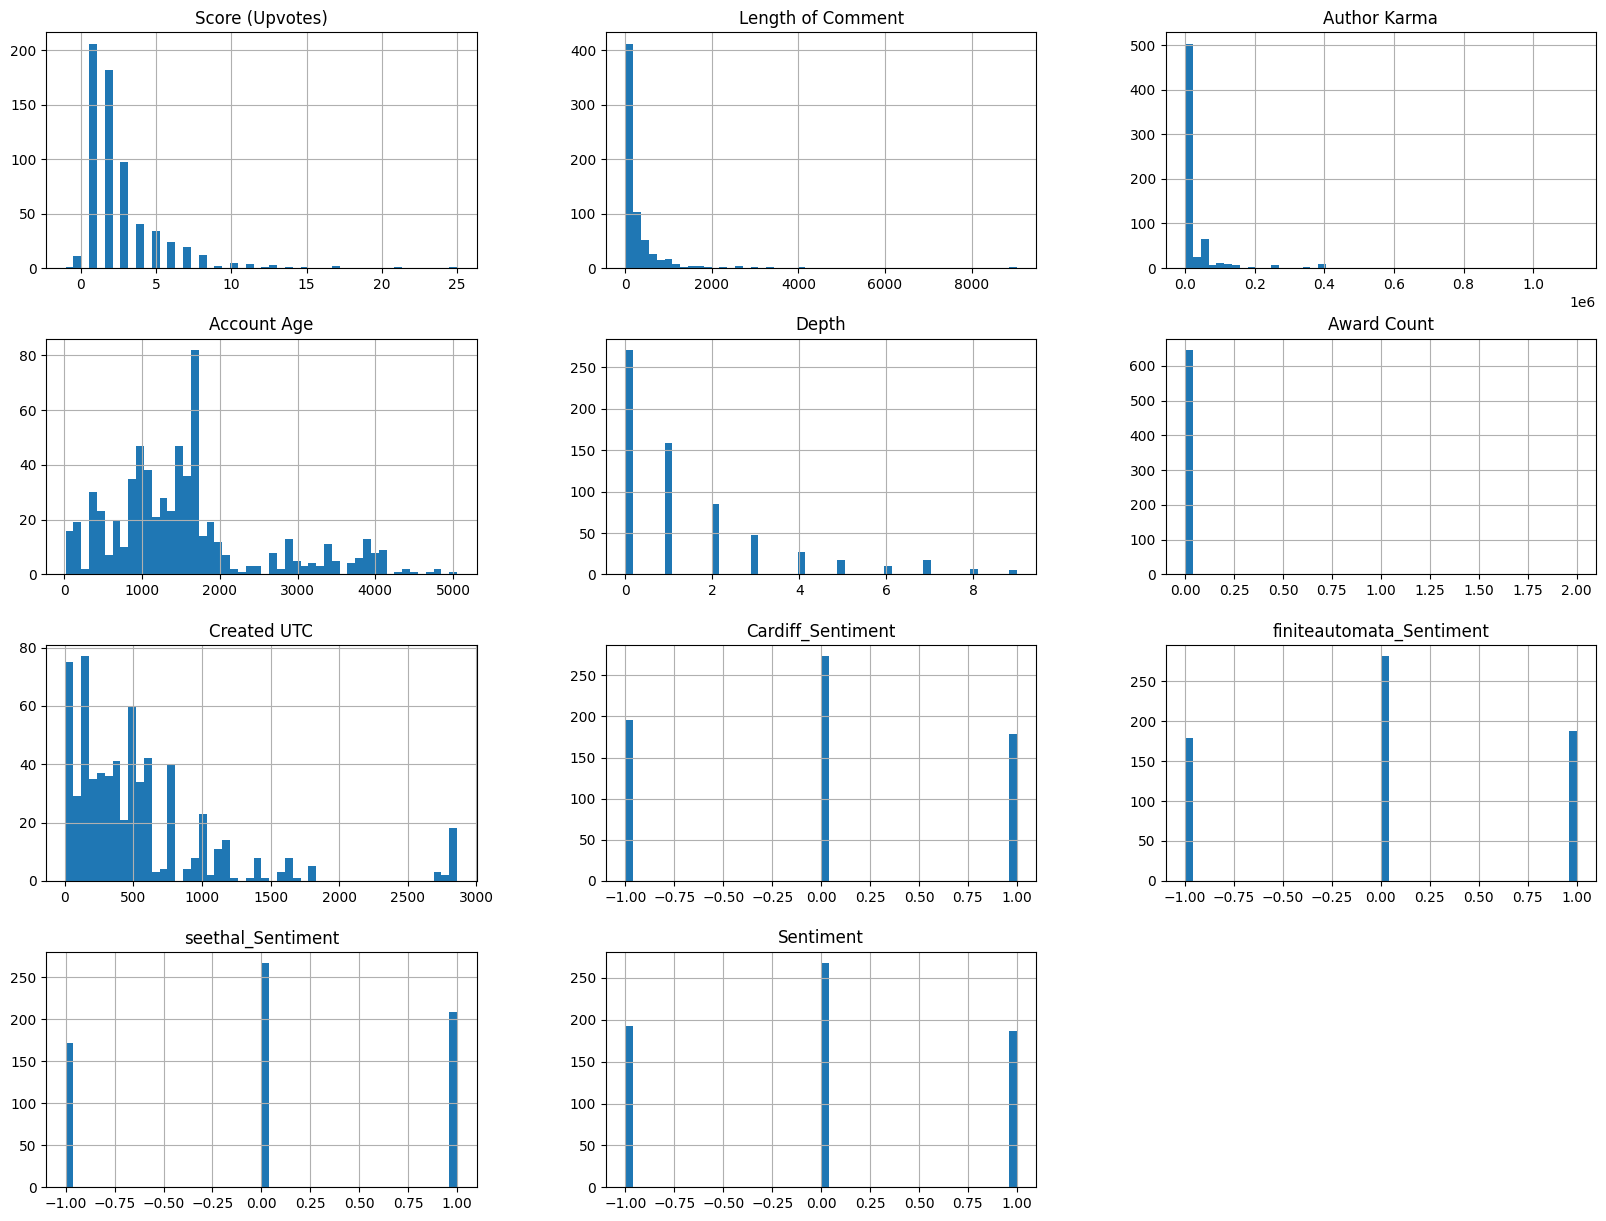

In [13]:
# Plotting the histogram of all the meta-data
all_comments.hist(bins=50, figsize=(20,15))
plt.show()

#### Observations:
This histograms help us identify a few basic trends regarding the dataset. We will explore each of these trends in detail in the following sections. 

### Histograms of the numerical meta-data for different sentiments 

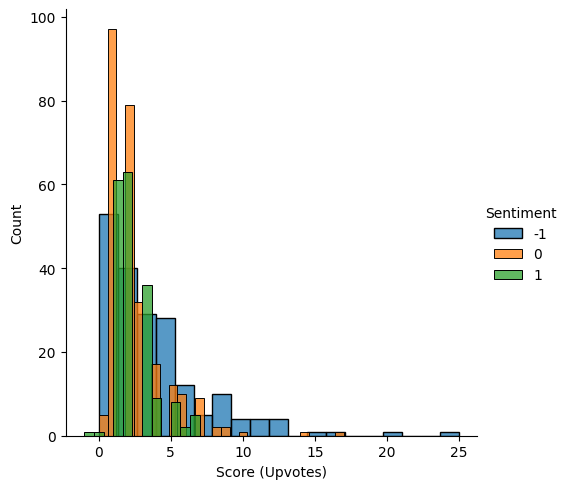

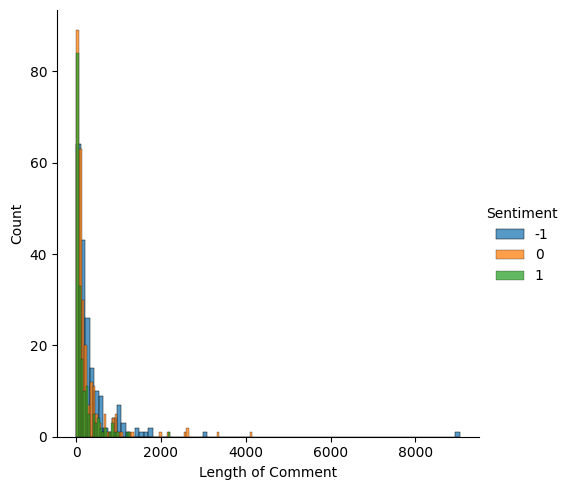

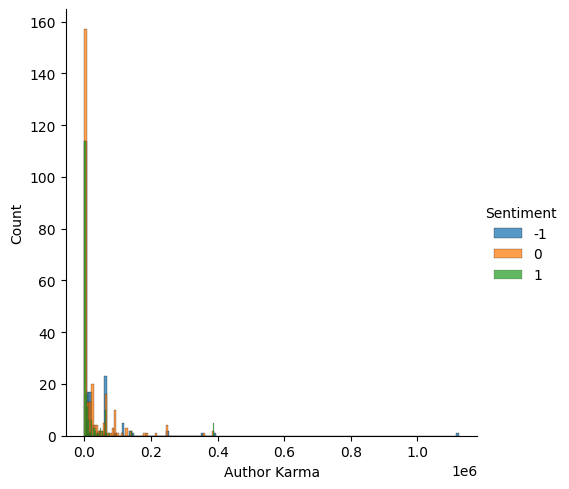

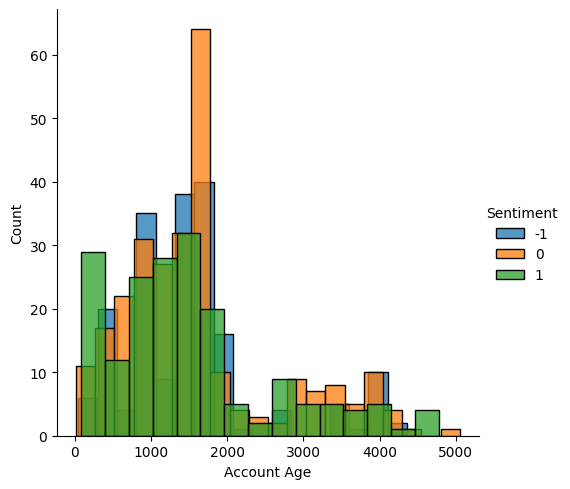

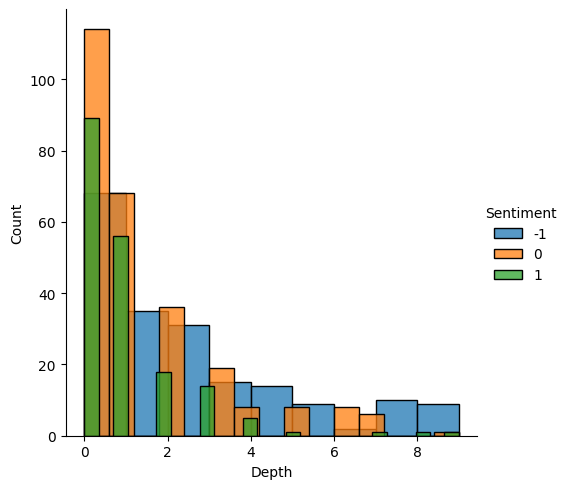

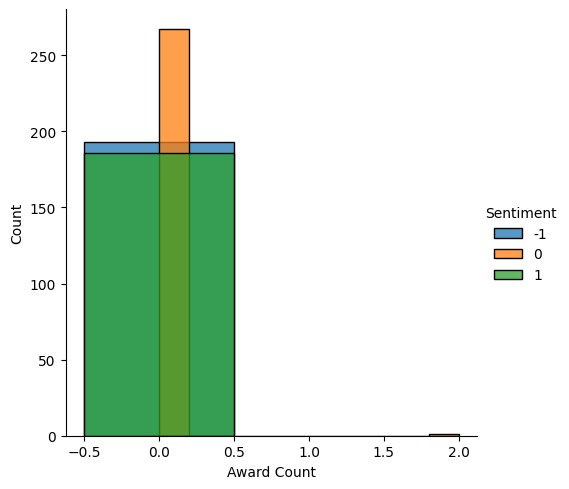

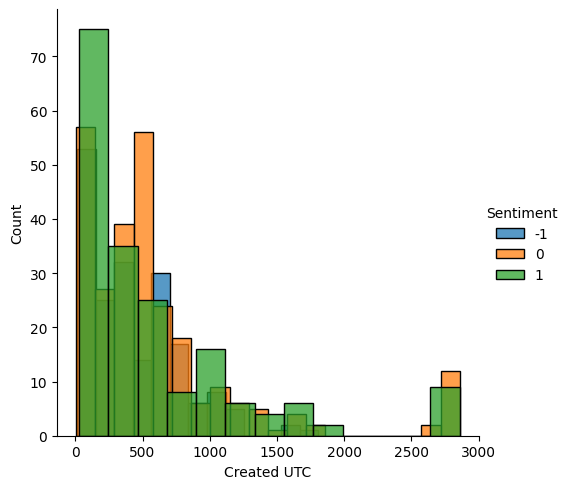

In [14]:
# Plotting Histograms and Probability Density Functions.

# Store all the int and float features in a list
feature = []
for col in all_comments.columns:
    if all_comments[col].dtype in ['int64', 'float64']:
        feature.append(col)

for idx, feature in enumerate(list(feature)[:-4]):
    fg = sns.FacetGrid(all_comments, hue='Sentiment', height=5)
    fg.map(sns.histplot, feature).add_legend()
    plt.show()

### Analysis of the Comments Sentiments on the basis of the Score (Upvotes) of the comments:

In [15]:
# Split the comments into 2 new dataframes, one with upvotes/score above 7 and the other with upvotes below 7
all_comments_above_7 = all_comments[all_comments['Score (Upvotes)'] >= 7]
all_comments_below_7 = all_comments[all_comments['Score (Upvotes)'] < 7]

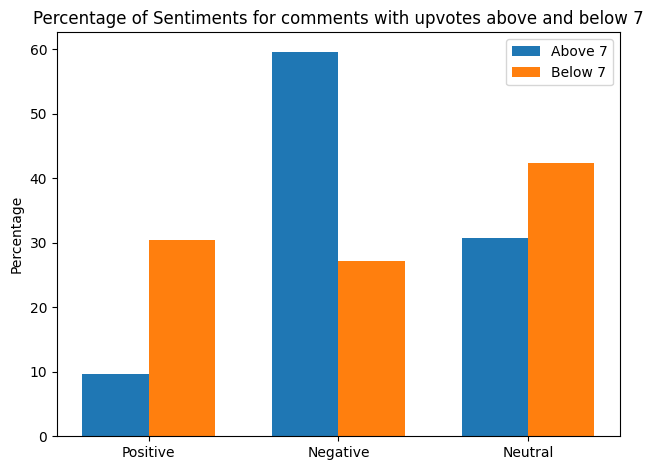

In [16]:
# Percentage of the three sentiments in the above new dataframes
comments_above_7_pos_percentage = (all_comments_above_7[all_comments_above_7['Sentiment'] == 1].shape[0] / all_comments_above_7.shape[0]) * 100
comments_above_7_neg_percentage = (all_comments_above_7[all_comments_above_7['Sentiment'] == -1].shape[0] / all_comments_above_7.shape[0]) * 100
comments_above_7_neu_percentage = (all_comments_above_7[all_comments_above_7['Sentiment'] == 0].shape[0] / all_comments_above_7.shape[0]) * 100

comments_below_7_pos_percentage = (all_comments_below_7[all_comments_below_7['Sentiment'] == 1].shape[0] / all_comments_below_7.shape[0]) * 100
comments_below_7_neg_percentage = (all_comments_below_7[all_comments_below_7['Sentiment'] == -1].shape[0] / all_comments_below_7.shape[0]) * 100
comments_below_7_neu_percentage = (all_comments_below_7[all_comments_below_7['Sentiment'] == 0].shape[0] / all_comments_below_7.shape[0]) * 100

# Plotting the above percentages
labels = ['Positive', 'Negative', 'Neutral']
above_7 = [comments_above_7_pos_percentage, comments_above_7_neg_percentage, comments_above_7_neu_percentage]
below_7 = [comments_below_7_pos_percentage, comments_below_7_neg_percentage, comments_below_7_neu_percentage]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, above_7, width, label='Above 7')
rects2 = ax.bar(x + width/2, below_7, width, label='Below 7')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Sentiments for comments with upvotes above and below 7')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#### Conclusions:
Here it can be easily seen that the comments with higher upvotes/score are more likely to be a negative sentiment comment. This perhaps means that generally negative comments are the ones that gain more attention, more popularity and hence more upvotes. This is a very interesting observation and can be used to further analyze the data.  

### Analysis of the Comments Sentiments on the basis of the Length of the comments:

In [17]:
# Interative Plot for our understanding

def plot_sentiment_percentage_length(length_of_comment):
    # Split the comments into 2 new dataframes, one with length above length_of_comment and the other with length below length_of_comment
    all_comments_above_length = all_comments[all_comments['Length of Comment'] >= length_of_comment]
    all_comments_below_length = all_comments[all_comments['Length of Comment'] < length_of_comment]

    # Percentage of the three sentiments in the above new dataframes
    comments_above_length_pos_percentage = (all_comments_above_length[all_comments_above_length['Sentiment'] == 1].shape[0] / all_comments_above_length.shape[0]) * 100
    comments_above_length_neg_percentage = (all_comments_above_length[all_comments_above_length['Sentiment'] == -1].shape[0] / all_comments_above_length.shape[0]) * 100
    comments_above_length_neu_percentage = (all_comments_above_length[all_comments_above_length['Sentiment'] == 0].shape[0] / all_comments_above_length.shape[0]) * 100

    comments_below_length_pos_percentage = (all_comments_below_length[all_comments_below_length['Sentiment'] == 1].shape[0] / all_comments_below_length.shape[0]) * 100
    comments_below_length_neg_percentage = (all_comments_below_length[all_comments_below_length['Sentiment'] == -1].shape[0] / all_comments_below_length.shape[0]) * 100
    comments_below_length_neu_percentage = (all_comments_below_length[all_comments_below_length['Sentiment'] == 0].shape[0] / all_comments_below_length.shape[0]) * 100

    # Plotting the above percentages
    labels = ['Positive', 'Negative', 'Neutral']
    above_length = [comments_above_length_pos_percentage, comments_above_length_neg_percentage, comments_above_length_neu_percentage]
    below_length = [comments_below_length_pos_percentage, comments_below_length_neg_percentage, comments_below_length_neu_percentage]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, above_length, width, label='Above Length')
    rects2 = ax.bar(x + width/2, below_length, width, label='Below Length')

    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Sentiments for comments with length above and below ' + str(length_of_comment))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

# Create an interatice plot to see the percentage of sentiments for comments with length above and below a certain length
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(plot_sentiment_percentage_length, length_of_comment=widgets.IntSlider(min=1, max=9045, step=10, value=100))

interactive(children=(IntSlider(value=100, description='length_of_comment', max=9045, min=1, step=10), Output(…

<function __main__.plot_sentiment_percentage_length(length_of_comment)>

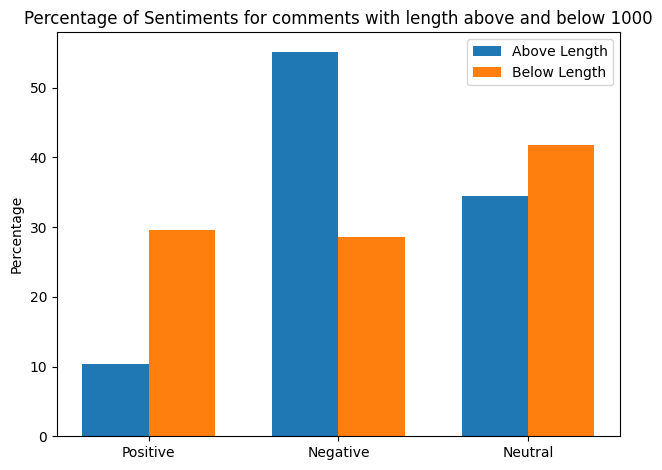

In [18]:
plot_sentiment_percentage_length(1000)

#### Conclusions: 
Here it can be easily seen that the comments that are longer are more likely to be a negative sentiment comment. This perhaps might mean that maybe when writing a postive comment, people tend to simply write a sentence or two, but when writing a negative comment, people tend to write a lot more in order to express and explain their somewhat negative feelings. 

### Analysis of the Comments Sentiments on the basis of the Karma of the user who posted the:

c:\Users\Inder\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Inder\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

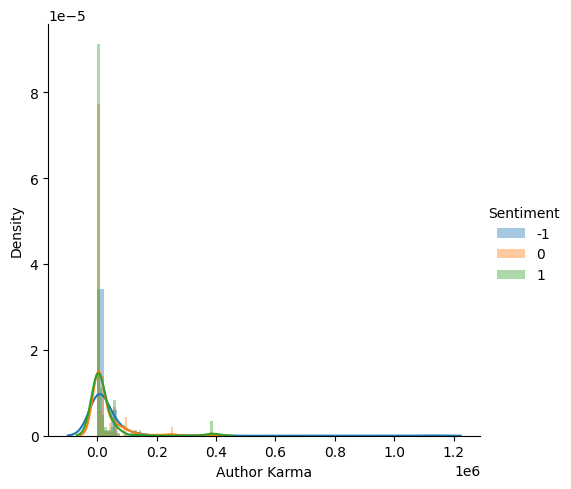

In [19]:
# Plotting Histograms and Probability Density Functions.

for idx, feature in enumerate(list(["Author Karma" , ""])[:-1]):
    fg = sns.FacetGrid(all_comments, hue='Sentiment', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

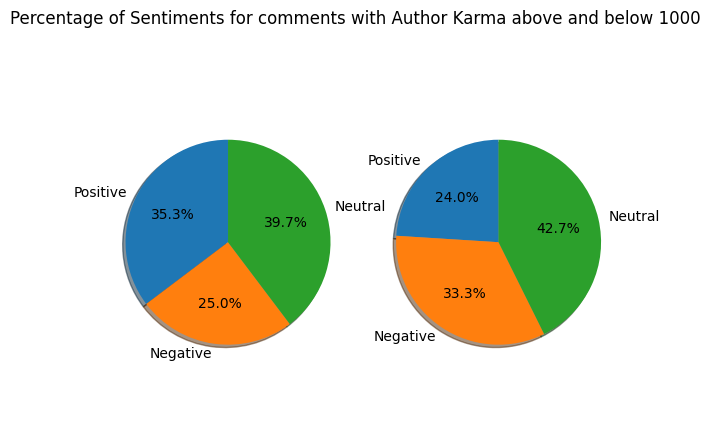

In [20]:
# Split the comments in 2 dataframes of Author Karma above and below 1000
comments_karma_above_1000 = all_comments[all_comments['Author Karma'] >= 1000]
comments_karma_below_1000 = all_comments[all_comments['Author Karma'] < 1000]

# Create pie charts for the percentage of each sentiment for Author Karma above and below 1000
labels = ['Positive', 'Negative', 'Neutral']
comments_karma_above_1000_pos_percentage = (comments_karma_above_1000[comments_karma_above_1000['Sentiment'] == 1].shape[0] / comments_karma_above_1000.shape[0]) * 100
comments_karma_above_1000_neg_percentage = (comments_karma_above_1000[comments_karma_above_1000['Sentiment'] == -1].shape[0] / comments_karma_above_1000.shape[0]) * 100
comments_karma_above_1000_neu_percentage = (comments_karma_above_1000[comments_karma_above_1000['Sentiment'] == 0].shape[0] / comments_karma_above_1000.shape[0]) * 100

comments_karma_below_1000_pos_percentage = (comments_karma_below_1000[comments_karma_below_1000['Sentiment'] == 1].shape[0] / comments_karma_below_1000.shape[0]) * 100
comments_karma_below_1000_neg_percentage = (comments_karma_below_1000[comments_karma_below_1000['Sentiment'] == -1].shape[0] / comments_karma_below_1000.shape[0]) * 100
comments_karma_below_1000_neu_percentage = (comments_karma_below_1000[comments_karma_below_1000['Sentiment'] == 0].shape[0] / comments_karma_below_1000.shape[0]) * 100

above_1000 = [comments_karma_above_1000_pos_percentage, comments_karma_above_1000_neg_percentage, comments_karma_above_1000_neu_percentage]
below_1000 = [comments_karma_below_1000_pos_percentage, comments_karma_below_1000_neg_percentage, comments_karma_below_1000_neu_percentage]

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Percentage of Sentiments for comments with Author Karma above and below 1000')
ax1.pie(below_1000, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax2.pie(above_1000, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.show()

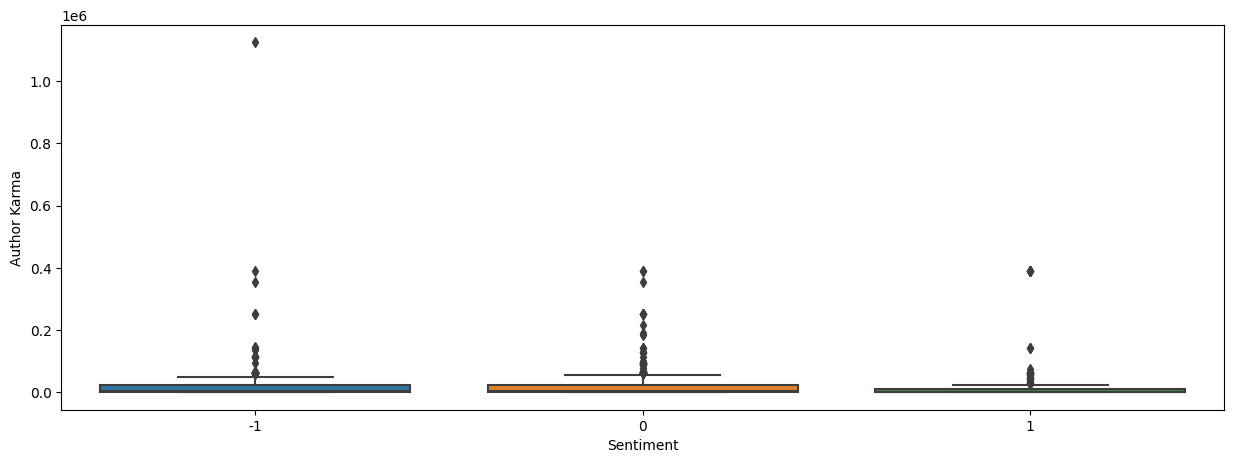

In [21]:
# Plotting Box Plots
fig = plt.subplots(1, figsize=(15, 5))
sns.boxplot( x='Sentiment', y='Author Karma', data=all_comments)
# plt.ylim(-0, 1.2)
plt.show()

#### Conclusion: 
Here it can be somewhat see using the pie chart that the comments that are posted by users with higher karma are more likely to be a negative sentiment comment. This perhaps might mean that maybe the users with higher karma are more likely to be more active on the subreddit and hence post more controversial comments which are more likely to contain negative sentiment. 

### Analysis of the Comments Sentiments on the basis of the Depth of the comment

The depth of a comment indicates the position of the comment in the comment tree. The depth of the root comment is 0. The depth of the child comments of the root comment is 1 and so on.

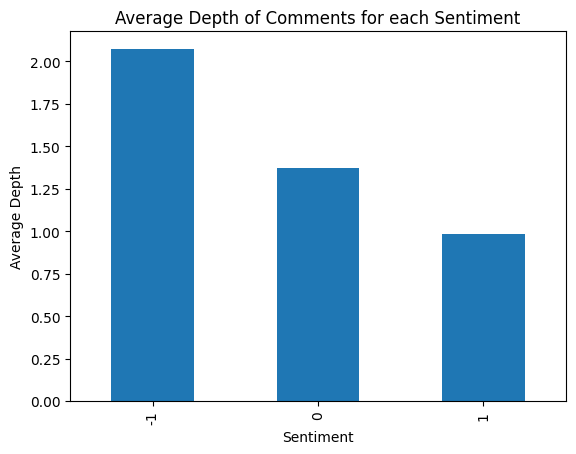

In [22]:
# Plot a histogram that represents the average depth of the comments for each sentiment
all_comments.groupby('Sentiment')['Depth'].mean().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Average Depth')
plt.title('Average Depth of Comments for each Sentiment')
# plt.yticks(np.arange(0, 3, 1))
plt.show()


The average depth of the comments for each sentiment is calculated and plotted above. 

We can conclude that the average depth of the negative comments is higher than the average depth of the positive and neutral comments. This means that perhaps the negative comments usually occur in longer conversation threads. This observation and can be used to further analyze the data.

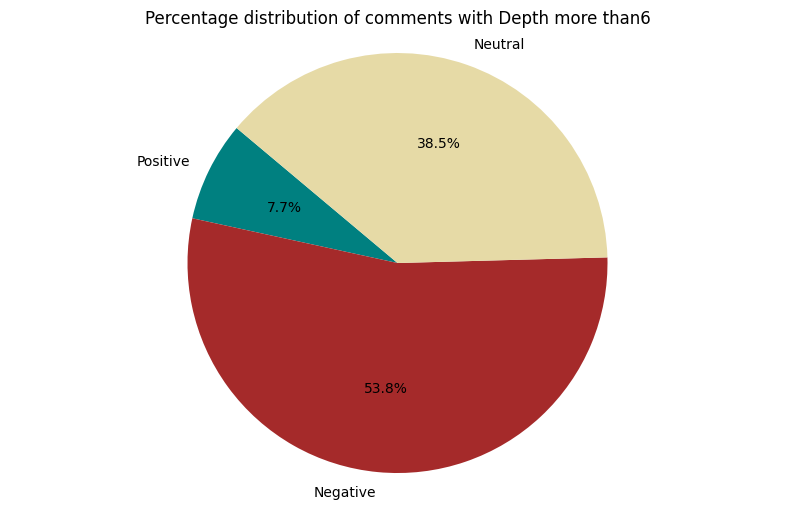

In [23]:
# Plot pie charts for the percentage of sentiments below and above a certain depth of comments. Control the depth using ipywidgets interact

from ipywidgets import interact, interactive
import ipywidgets as widgets

def plot_sentiment_percentage_depth(depth_of_comment):
    # Split the comments into 2 new dataframes, one with depth above depth_of_comment and the other with depth below depth_of_comment
    all_comments_above_depth = all_comments[all_comments['Depth'] >= depth_of_comment]
    all_comments_below_depth = all_comments[all_comments['Depth'] < depth_of_comment]

    # Percentage of the three sentiments in the above new dataframes
    comments_above_depth_pos_percentage = (all_comments_above_depth[all_comments_above_depth['Sentiment'] == 1].shape[0] / all_comments_above_depth.shape[0]) * 100
    comments_above_depth_neg_percentage = (all_comments_above_depth[all_comments_above_depth['Sentiment'] == -1].shape[0] / all_comments_above_depth.shape[0]) * 100
    comments_above_depth_neu_percentage = (all_comments_above_depth[all_comments_above_depth['Sentiment'] == 0].shape[0] / all_comments_above_depth.shape[0]) * 100

    comments_below_depth_pos_percentage = (all_comments_below_depth[all_comments_below_depth['Sentiment'] == 1].shape[0] / all_comments_below_depth.shape[0]) * 100
    comments_below_depth_neg_percentage = (all_comments_below_depth[all_comments_below_depth['Sentiment'] == -1].shape[0] / all_comments_below_depth.shape[0]) * 100
    comments_below_depth_neu_percentage = (all_comments_below_depth[all_comments_below_depth['Sentiment'] == 0].shape[0] / all_comments_below_depth.shape[0]) * 100

    # Plotting the above percentages
    labels = ['Positive', 'Negative', 'Neutral']
    above_depth = [comments_above_depth_pos_percentage, comments_above_depth_neg_percentage, comments_above_depth_neu_percentage]
    below_depth = [comments_below_depth_pos_percentage, comments_below_depth_neg_percentage, comments_below_depth_neu_percentage]
    colors = ['#008080', '#A52A2A', '#E6DAA6']


    fig = plt.figure(figsize=(10,6))
    plt.pie(above_depth, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Percentage distribution of comments with Depth more than' + str(depth_of_comment))
    plt.show()

plot_sentiment_percentage_depth(6)
    


This piechart reiterates that more that half of the comments that are part of a long chain of comments are negative comments.

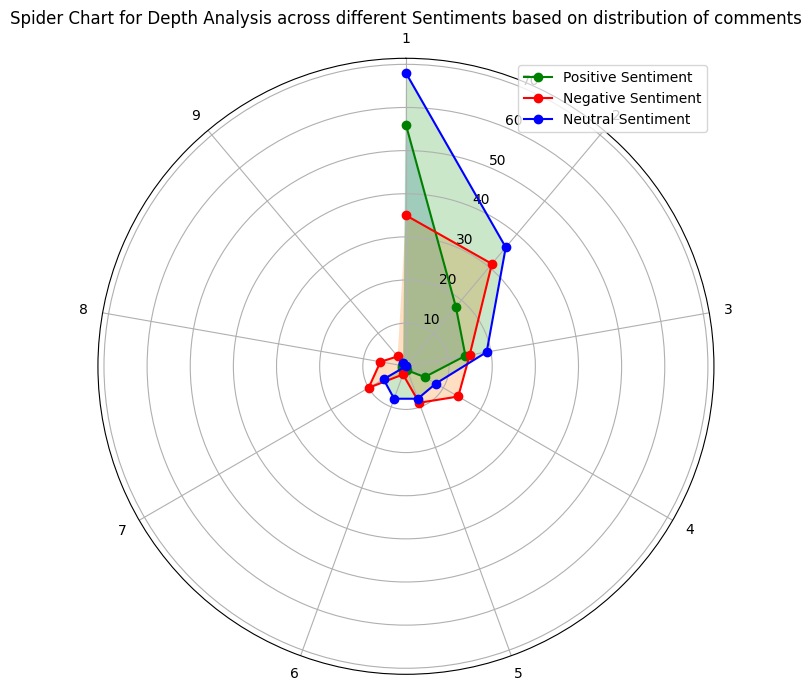

In [24]:
# Make arrays containing number of comments for each depth for each sentiment
pos_depth = [all_comments.loc[(all_comments['Sentiment'] == 1) & (all_comments['Depth'] == i)].shape[0] for i in range(1, 10)]
neg_depth = [all_comments.loc[(all_comments['Sentiment'] == -1) & (all_comments['Depth'] == i)].shape[0] for i in range(1, 10)]
neu_depth = [all_comments.loc[(all_comments['Sentiment'] == 0) & (all_comments['Depth'] == i)].shape[0] for i in range(1, 10)]

# Boundary labels
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '1']

# Create a figure and polar axis
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, len(labels)-1, endpoint=False)

# Plot data arrays
ax.plot(angles, pos_depth, label='Positive Sentiment', marker='o', color='green')
ax.fill(angles, pos_depth, alpha=0.25)

ax.plot(angles, neg_depth, label='Negative Sentiment', marker='o', color='red')
ax.fill(angles, neg_depth, alpha=0.25)

ax.plot(angles, neu_depth, label='Neutral Sentiment', marker='o', color='blue')
ax.fill(angles, neu_depth, alpha=0.25)

# Set the labels for each category
ax.set_xticks(angles)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Set the initial angle at the top
ax.set_theta_offset(np.pi / 2)

# Set clockwise rotation for better visualization
ax.set_theta_direction(-1)

# Add a title and legend
plt.title('Spider Chart for Depth Analysis across different Sentiments based on distribution of comments')
plt.legend()

# Show the plot
plt.show()

This spider chart nicely represnts the distribution of the sentiments across different depths of comments. 

We can see that:
- The for comments with higher depth the negative sentiment is more apparent. The comments with higher depth are only either negative or neutral and not at all positive
- The even higher depth comments are only negative. 

This concludes that negative sentiment attracts more replies and hence they occur in longer post threads. 

Therefore, the negative sentiment conversation are highly likely to be a long chain of comments.

C:\Users\Inder\AppData\Local\Temp\ipykernel_38296\3219494124.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  neg_comments = all_comments[all_comments['Sentiment'] == -1][all_comments['Depth'] != 0]
C:\Users\Inder\AppData\Local\Temp\ipykernel_38296\3219494124.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if parent['Sentiment'].values == -1:
C:\Users\Inder\AppData\Local\Temp\ipykernel_38296\3219494124.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  elif parent['Sentiment'].values == 0:
C:\Users\Inder\AppData\Local\Temp\ipykernel_38296\3219494124.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will 

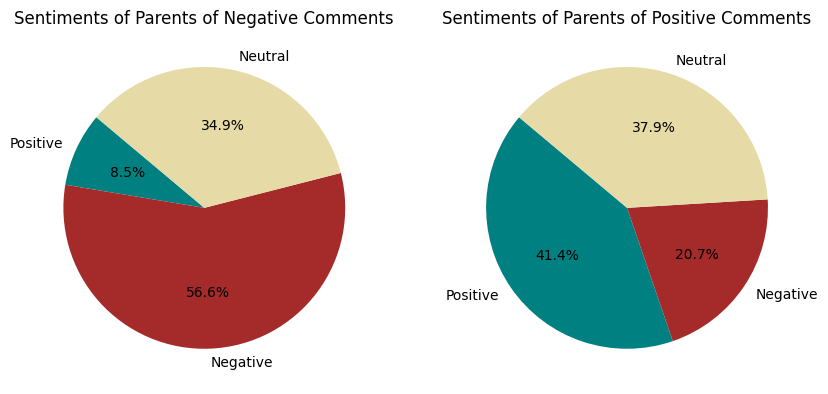

In [25]:
## NEGATIVE COMMENT
# Get all the negative sentiment comments and remove the ones with depth 0
neg_comments = all_comments[all_comments['Sentiment'] == -1][all_comments['Depth'] != 0]
neg_parents_neg_comments = 0
neu_parents_neg_comments = 0
pos_parents_neg_comments = 0

# Get the parent of each negative comment and check its sentiment
for idx, comment in neg_comments.iterrows():
    parent_id = comment['Parent ID'][3:]
    parent = all_comments[all_comments['Comment ID'] == parent_id]
    # print(parent['Sentiment'])
    if parent['Sentiment'].values == -1:
        neg_parents_neg_comments += 1
    elif parent['Sentiment'].values == 0:
        neu_parents_neg_comments += 1
    elif parent['Sentiment'].values == 1:
        pos_parents_neg_comments += 1


## POSITIVE COMMENT
# Get all the positive sentiment comments and remove the ones with depth 0
pos_comments = all_comments[all_comments['Sentiment'] == 1][all_comments['Depth'] != 0]
neg_parents_pos_comments = 0
neu_parents_pos_comments = 0
pos_parents_pos_comments = 0

# Get the parent of each positive comment and check its sentiment
for idx, comment in pos_comments.iterrows():
    parent_id = comment['Parent ID'][3:]
    parent = all_comments[all_comments['Comment ID'] == parent_id]
    # print(parent['Sentiment'])
    if parent['Sentiment'].values == -1:
        neg_parents_pos_comments += 1
    elif parent['Sentiment'].values == 0:
        neu_parents_pos_comments += 1
    elif parent['Sentiment'].values == 1:
        pos_parents_pos_comments += 1


# Plotting the above percentages
labels = ['Positive', 'Negative', 'Neutral']
parents_percentages_neg_comments = [pos_parents_neg_comments, neg_parents_neg_comments, neu_parents_neg_comments]
parents_percentages_pos_comments = [pos_parents_pos_comments, neg_parents_pos_comments, neu_parents_pos_comments]
colors = ['#008080', '#A52A2A', '#E6DAA6']


fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].pie(parents_percentages_neg_comments, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Sentiments of Parents of Negative Comments')

ax[1].pie(parents_percentages_pos_comments, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Sentiments of Parents of Positive Comments')
plt.show()

The above pie charts depict that comment threads for a particular post tend to follow a general trend in terms of sentiment. That is, if a comment is positive, it is more likely that the next comment in that thread (or its chid comment) will also be positive. Similarly, if a comment is negative, it is more likely that the next comment in that thread (or its chid comment) will also be negative. This is a very interesting observation and can be used to determine the generally gauge the sentiment of the comment thread.

#### Conclusions:

In conclusion to all the above analysis on depth and corresponding comment sentiments, we can say that negative sentiment comment threads ususally lead to a longer conversation and therefore, the negative sentiment related posts attract more viewers according to our dataset.

### Analysis of the Comments Sentiments on the basis of the Length of the comments:

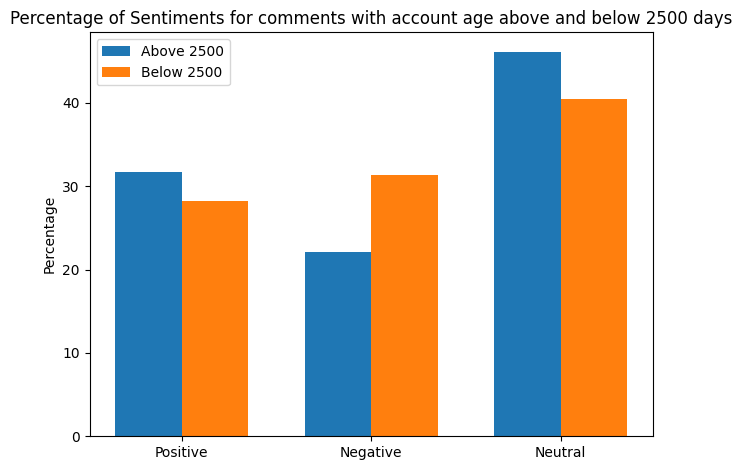

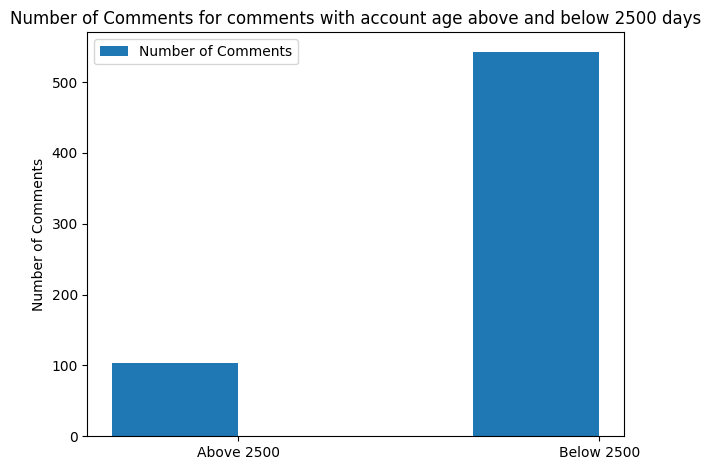

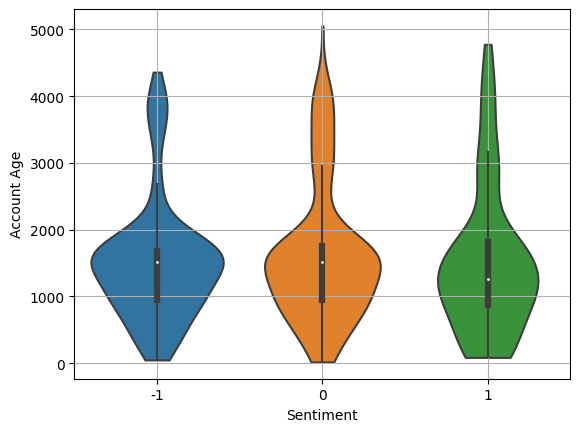

In [26]:
# Creating plots for comparing the percentage of sentiments for different buckets of account age
def plot_sentiment_percentage_account_age(age):

    # Split the comments into 2 new dataframe, one with account age above 2500 and the other with account age below 2500
    all_comments_above_2500 = all_comments[all_comments['Account Age'] >= age]
    all_comments_below_2500 = all_comments[all_comments['Account Age'] < age]

    # Percentage of the three sentiments in the above new dataframes
    comments_above_2500_pos_percentage = (all_comments_above_2500[all_comments_above_2500['Sentiment'] == 1].shape[0] / all_comments_above_2500.shape[0]) * 100

    comments_above_2500_neg_percentage = (all_comments_above_2500[all_comments_above_2500['Sentiment'] == -1].shape[0] / all_comments_above_2500.shape[0]) * 100

    comments_above_2500_neu_percentage = (all_comments_above_2500[all_comments_above_2500['Sentiment'] == 0].shape[0] / all_comments_above_2500.shape[0]) * 100

    comments_below_2500_pos_percentage = (all_comments_below_2500[all_comments_below_2500['Sentiment'] == 1].shape[0] / all_comments_below_2500.shape[0]) * 100

    comments_below_2500_neg_percentage = (all_comments_below_2500[all_comments_below_2500['Sentiment'] == -1].shape[0] / all_comments_below_2500.shape[0]) * 100

    comments_below_2500_neu_percentage = (all_comments_below_2500[all_comments_below_2500['Sentiment'] == 0].shape[0] / all_comments_below_2500.shape[0]) * 100

    # Plotting the above percentages
    labels = ['Positive', 'Negative', 'Neutral']
    above_2500 = [comments_above_2500_pos_percentage, comments_above_2500_neg_percentage, comments_above_2500_neu_percentage]
    below_2500 = [comments_below_2500_pos_percentage, comments_below_2500_neg_percentage, comments_below_2500_neu_percentage]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, above_2500, width, label='Above 2500')
    rects2 = ax.bar(x + width/2, below_2500, width, label='Below 2500')

    ax.set_ylabel('Percentage')
    ax.set_title('Percentage of Sentiments for comments with account age above and below 2500 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

# Create a plot to compare the number of comments in each bucket of account age
def plot_number_of_comments_account_age(age):

    # Split the comments into 2 new dataframe, one with account age above 2500 and the other with account age below 2500
    all_comments_above_2500 = all_comments[all_comments['Account Age'] >= age]
    all_comments_below_2500 = all_comments[all_comments['Account Age'] < age]

    # Number of comments in each bucket
    above_2500 = all_comments_above_2500.shape[0]
    below_2500 = all_comments_below_2500.shape[0]

    # Plotting the above percentages
    labels = ['Above 2500', 'Below 2500']
    number_of_comments = [above_2500, below_2500]

    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, number_of_comments, width, label='Number of Comments')

    ax.set_ylabel('Number of Comments')
    ax.set_title('Number of Comments for comments with account age above and below 2500 days')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

# Create a violinplot for comparing the count vs the accoung age for each sentiment
def violinplot_count_vs_account_age_sentiment():
    sns.violinplot(x='Sentiment', y='Account Age', data=all_comments, cut=0)
    plt.grid()
    plt.show()
    
AGE = 2500
plot_sentiment_percentage_account_age(AGE)
plot_number_of_comments_account_age(AGE)
violinplot_count_vs_account_age_sentiment()

#### Conclusions:
The majority of the comments from both old and new accounts are neutral. However, when we compare the percentage of positive to negative, we can observe that for older accounts(above 2500 days), there are more positive comments. However, this trend flips when we compare it for newer accounts(below 2500 days). The majority of the comments are still neutral, however, there are slightly more negative sentiment in the comments than positive ones.

We can also see that most of the comments for all three types of sentiments are coming from accounts which are lying between 1000 and 2000 days old. This may imply that it is during this time that many people got access to the internet and social media. The activity of these account may not be entirely explained by their time of creation, and it may be useful to see the actual time of the comments that were posted.

### Analysing the pattern of the sentiments of comments over time

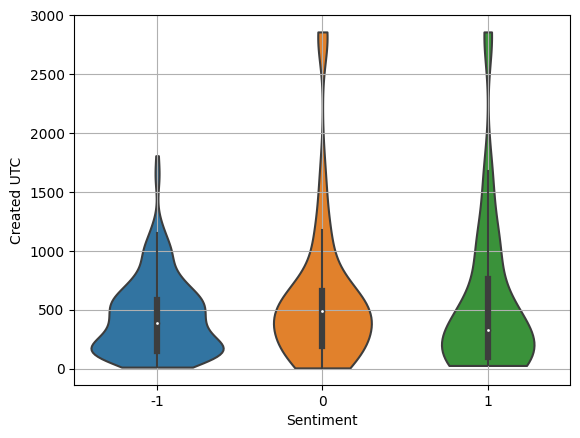

In [27]:
# Creating a violing chart for the count vs created utc for each sentiment

sns.violinplot(x='Sentiment', y='Created UTC', data=all_comments, cut=0)
plt.grid()
plt.show()

#### Conclusions:
We can see that the earlier comments where mostly neutral or positive. However, as we come nearer to the present, the volumne of negative comments increases. The Negative comments are also the most volatile, as it might be pertaining to specific events happening at that time

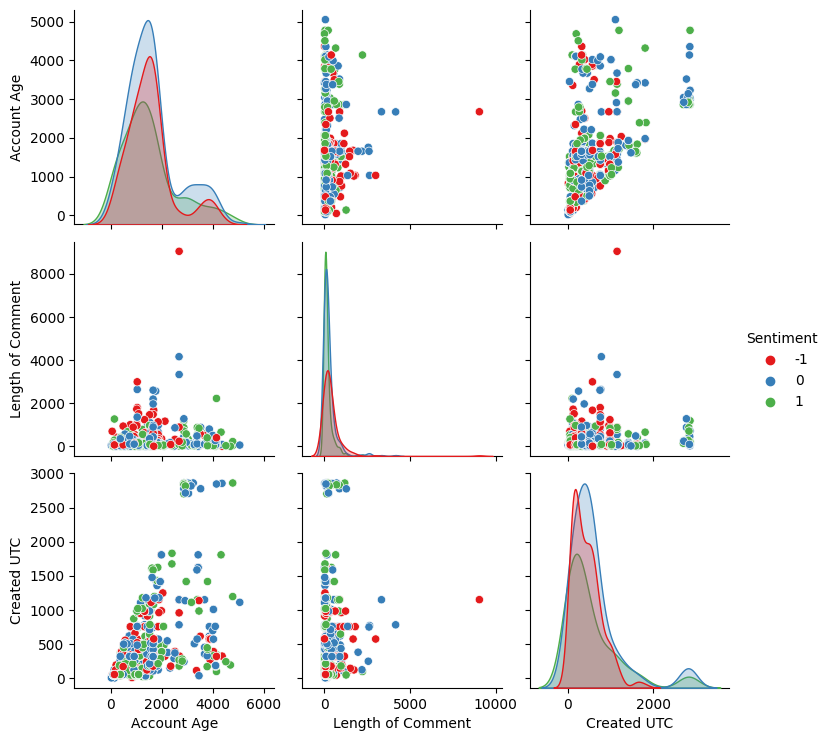

In [28]:
# Creating pair plots for account age, length of comment, and author karma

sns.pairplot(all_comments[['Account Age', 'Length of Comment', 'Created UTC', 'Sentiment']], hue='Sentiment', palette='Set1')
plt.show()

We can see from the Created UTC vs Account Age plot that most of the comments are located near the x = y line. This means that most of the comments are coming from fresh or relatively fresh accounts and the old accounts are not actively commenting as compared to the fresher accounts.

The other plots are not that useful since they are crowded.

--------

#### Overall Observations and Conclusions:

- Comments with higher upvotes/score are more likely to be a negative sentiment comment i.e. perhaps negative comments gain more attention and popularity over others.

- Longer comments are more likely to be negative sentiment comments.

- Comments posted by users with higher karma are more likely to be negative i.e. more active users take part in controversial conversations.

- Negative sentiment comments usually are part of longer threads i.e. negative conversations attract more views and lead to a longer chain of comments.

- The amount of negative sentiment in comments has increased over time.

- Most comments pertain to accounts that are 1000-2000 days old i.e. it perhaps signifies a time when the internet became more accessible/popular.

- Most comments come from freshly created accounts compared to older accounts.